## Preprocessing

In [1]:
# Importing dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint

# Importing and reading the charity_data.csv file
import pandas as pd 
import hvplot.pandas

# Ignoring warning messages that might be generated during the execution of the program
import warnings
warnings.filterwarnings('ignore')

# Importing holoviews to save plots as png files
import holoviews as hv
import os

# Importing the required libraries for the deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Dropping the non-beneficial ID columns, 'EIN' and 'NAME'
application_df = application_df.drop(columns=["EIN", "NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determining the number of unique values in each column
unique_counts = application_df.nunique()
unique_counts

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Looking at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [5]:
# Iterating through columns and print the data points for columns with more than 10 unique values
for column, unique_count in unique_counts.items():
    if unique_count > 10:
        print(f"Column: {column}")
        unique_values = application_df[column].unique()
        for value in unique_values:
            count = application_df[application_df[column] == value].shape[0]
            print(f"Value: {value}, Count: {count}")
        print("=" * 30)

Column: APPLICATION_TYPE
Value: T10, Count: 528
Value: T3, Count: 27037
Value: T5, Count: 1173
Value: T7, Count: 725
Value: T4, Count: 1542
Value: T6, Count: 1216
Value: T2, Count: 16
Value: T9, Count: 156
Value: T19, Count: 1065
Value: T8, Count: 737
Value: T13, Count: 66
Value: T12, Count: 27
Value: T29, Count: 2
Value: T25, Count: 3
Value: T14, Count: 3
Value: T17, Count: 1
Value: T15, Count: 2
Column: CLASSIFICATION
Value: C1000, Count: 17326
Value: C2000, Count: 6074
Value: C3000, Count: 1918
Value: C1200, Count: 4837
Value: C2700, Count: 104
Value: C7000, Count: 777
Value: C7200, Count: 32
Value: C1700, Count: 287
Value: C4000, Count: 194
Value: C7100, Count: 75
Value: C2800, Count: 95
Value: C6000, Count: 15
Value: C2100, Count: 1883
Value: C1238, Count: 10
Value: C5000, Count: 116
Value: C7120, Count: 18
Value: C1800, Count: 15
Value: C4100, Count: 6
Value: C1400, Count: 34
Value: C1270, Count: 114
Value: C2300, Count: 32
Value: C8200, Count: 11
Value: C1500, Count: 16
Value: C

In [6]:
# Choosing a cutoff value and creating a list of application types to be replaced by using the variable name `application_types_to_replace`
application_types_to_replace = list(application_counts[application_counts < 528].index)

# Replacing in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Checking to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Looking at CLASSIFICATION value counts for binning
classification_counts_bining1 = application_df.CLASSIFICATION.value_counts()
classification_counts_bining1

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# Looking at CLASSIFICATION value counts >1
classification_counts = classification_counts_bining1[classification_counts_bining1 > 1]
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [9]:
# Choosing a cutoff value and creating a list of classifications to be replaced using the variable name `classifications_to_replace`
classifications_to_replace = list(classification_counts[classification_counts < 1883].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2235
C3000     1918
C2100     1883
C1370        1
C1236        1
C2190        1
C4200        1
C5200        1
C1248        1
C2600        1
C1580        1
C6100        1
C1820        1
C1900        1
C2570        1
C1570        1
C3700        1
C2500        1
C1283        1
C2380        1
C1732        1
C1728        1
C2170        1
C4120        1
C8210        1
C4500        1
C1245        1
C2561        1
C2150        1
Name: count, dtype: int64

In [10]:
# Converting categorical data to numeric with `pd.get_dummies`
numeric_application_df = pd.get_dummies(application_df, dtype=int)
numeric_application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
# Splitting the preprocessed data into features and target arrays
y = numeric_application_df.IS_SUCCESSFUL
X = numeric_application_df.drop(columns=["IS_SUCCESSFUL"], axis=1)

# Splitting the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Creating a StandardScaler instances
scaler = StandardScaler()

# Fitting the StandardScaler
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Attempt 1
## Compiling, Training and Evaluating the Model as Below
### Cutoff Value Application:528
### CutOff Value Classification:1883
### Layer 1 Hidden Nodes: 10
### Layer 1: RELU
### Layer 2 Hidden Nodes: 5
### Layer 2: RELU
### Output Layer: SIGMOID
### Compiling: Loss=binary_crossentropy, optimizer=adam, metrics=accuracy
### Training the model with epochs=50

In [13]:
# Defining the model - deep neural net, i.e., the number of input features and hidden nodes for each layer
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Checking the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                700       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compiling the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Defining the path to the Output folder
output_folder = 'Output'

# Checking Output folder
os.makedirs(output_folder, exist_ok=True)

# Defining a callback to save weights every five epochs
save_weights_callback = ModelCheckpoint(
    filepath=os.path.join(output_folder, 'model_weights.h5'),  
    save_weights_only=True,       
    save_freq=5 * len(X_train),                     
)

In [15]:
# Training the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks=[save_weights_callback])

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6039 - accuracy: 0.6930
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5685 - accuracy: 0.7223
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5602 - accuracy: 0.7302
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5578 - accuracy: 0.7298
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5561 - accuracy: 0.7305
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7326
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5536 - accuracy: 0.7314
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7321
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7324
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7332

In [16]:
# Evaluating the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5546 - accuracy: 0.7258 - 549ms/epoch - 2ms/step
Loss: 0.5546468496322632, Accuracy: 0.7258309125900269


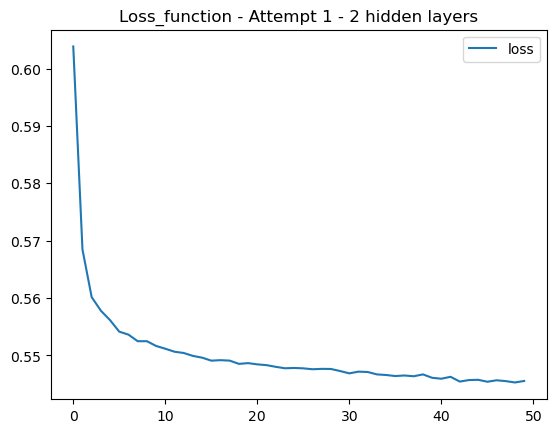

In [17]:
# Plotting the loss function
import matplotlib.pyplot as plt
plt.plot(fit_model.history["loss"])
plt.title("Loss_function - Attempt 1 - 2 hidden layers")
plt.legend(["loss"])

# Saving the plot to a file in the 'Output' folder
plt.savefig(os.path.join("Output", "Attempt1_Loss_Plot.png"))

plt.show()

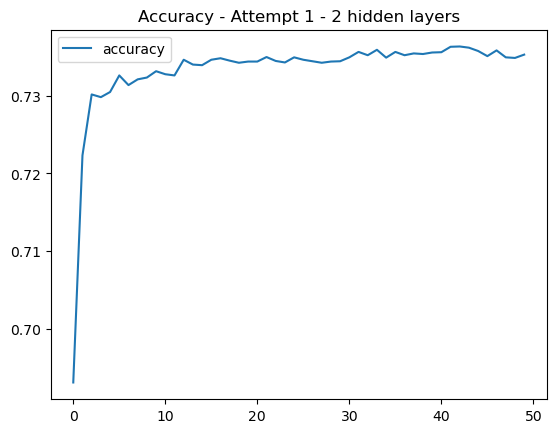

In [18]:
# Plotting the accuracy
plt.plot(fit_model.history["accuracy"])
plt.title("Accuracy - Attempt 1 - 2 hidden layers")
plt.legend(["accuracy"])

# Saving the plot to a file in the 'output' folder
plt.savefig(os.path.join("Output", "Attempt1_Accuracy_Plot.png"))

plt.show()

In [19]:
# Exporting model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_Attempt1.h5")